# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.**

In [21]:
import pandas as pd
data = pd.read_csv('Advertising.csv')
adv_data = data.copy()
adv_data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [22]:
missing_values = adv_data.isnull().sum()
missing_values
# удаление не требуется, так как пропущенные значения отсутствуют

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)**

In [23]:
import numpy as np

X = adv_data.drop(['Unnamed: 0', 'sales'], axis=1).values
y = adv_data['sales'].values

# Проверим размерности полученных массивов с новым именем переменной
X.shape, y.shape

((200, 3), (200,))

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [24]:
import numpy as np
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [25]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [26]:
def gradient_descent(X, y, iterations=1000, learning_rate=0.01):
    """
    Применяет градиентный спуск для определения весов линейной регрессии.

    :param X: массив numpy, матрица признаков
    :param y: массив numpy, вектор целевой переменной
    :param iterations: int, количество итераций градиентного спуска
    :param learning_rate: float, скорость обучения
    :return: w - вектор весов после градиентного спуска
    """
    m, n = X.shape
    w = np.zeros(n)  # Инициализация вектора весов w как нулевого
    r = np.zeros_like(y)  # Инициализация вектора остатков r

    for i in range(iterations):
        r = y - np.dot(X, w)
        for j in range(n):
            r_j = r + X[:, j] * w[j]
            w[j] = np.dot(X[:, j], r_j) / np.dot(X[:, j], X[:, j])
            r = r_j - X[:, j] * w[j]

    return w

weights = gradient_descent(X, y)
weights

array([ 41.56217205, 110.13144155,  73.52860638,  -0.55006384])

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

print(model.coef_)

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


In [28]:
# блок для сравнение полученных весов
error = 0

for i in range(len(model.coef_)):
    error = (weights[i] - model.coef_[i])**2
error = error / len(model.coef_)
print("MAE для нашего рассчета коэффициентов:", error)

MAE для нашего рассчета коэффициентов: 7.0701966779224285e-28


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [29]:
def scale_features(X):
    """
    Масштабирование признаков матрицы X путём вычитания среднего
    и деления на стандартное отклонение.

    :param X: numpy массив, матрица признаков
    :return: отмасштабированная матрица признаков
    """
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_scaled = (X - mean) / std

    return X_scaled

X_scaled = scale_features(X)
X_scaled[:5, :]

array([[ 1.        ,  0.96985227,  0.98152247,  1.77894547],
       [ 1.        , -1.19737623,  1.08280781,  0.66957876],
       [ 1.        , -1.51615499,  1.52846331,  1.78354865],
       [ 1.        ,  0.05204968,  1.21785493,  1.28640506],
       [ 1.        ,  0.3941822 , -0.84161366,  1.28180188]])

**Добавим единичный столбец**

In [30]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [31]:
def mse_error(actual, predicted):
    """
    Вычисление среднеквадратичной ошибки (MSE).

    :param actual: numpy массив, реальные значения целевой переменной.
    :param predicted: numpy массив, предсказанные значения целевой переменной.
    :return: значение среднеквадратичной ошибки.
    """
    # Вычисляем разность между реальными и предсказанными значениями
    difference = actual - predicted
    # Возводим разность в квадрат и вычисляем среднее
    mse = np.mean(difference ** 2)
    return mse

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [32]:
mean_sales = np.mean(y)

predicted_sales_mean = np.full(shape=y.shape, fill_value=mean_sales)

mse_for_mean_sales = mse_error(y, predicted_sales_mean)
mse_for_mean_sales

27.085743750000002

**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [33]:
def lin_pred(X, w):
    """
    Получение вектора прогнозов для линейной модели.

    :param X: numpy массив, матрица предикторов.
    :param w: numpy массив, вектор весов линейной модели.
    :return: вектор прогнозов.
    """
    # Расчет прогнозов как произведения матрицы X на вектор весов w
    predictions = np.dot(X, w)
    return predictions

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла)
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:

*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [34]:
def stoch_grad_step(X, y, w, train_ind, eta):
    """
    :param X: numpy массив, матрица предикторов.
    :param y: numpy массив, вектор целевой переменной.
    :param w: numpy массив, вектор весов модели.
    :param train_ind: int, индекс объекта обучающей выборки.
    :param eta: float, шаг градиентного спуска.
    :return: numpy массив, обновленный вектор весов.
    """
    l = X.shape[0]
    y_pred = np.dot(X[train_ind], w)
    grad = np.zeros_like(w)
    for j in range(len(w)):
        grad[j] = (2.0 / l) * X[train_ind, j] * (y_pred - y[train_ind])

    new_w = w - eta * grad

    return new_w


**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [35]:
def stochastic_gradient_descent(X, y, initial_w, eta, max_iter, tolerance):
    """
    Реализация стохастического градиентного спуска.

    :param X: numpy массив, матрица признаков.
    :param y: numpy массив, вектор целевой переменной.
    :param initial_w: numpy массив, начальный вектор весов модели.
    :param eta: float, темп обучения.
    :param max_iter: int, максимальное количество итераций.
    :param tolerance: float, евклидово расстояние между векторами весов, при котором алгоритм прекращает работу.
    :return: tuple, вектор весов и вектор (список) ошибок.
    """
    w = initial_w.copy()
    errors = []
    iter_count = 0
    weight_diff = np.inf

    while weight_diff > tolerance and iter_count < max_iter:
        random_ind = np.random.randint(low=0, high=X.shape[0])
        current_prediction = lin_pred(X, w)
        current_error = mse_error(y, current_prediction)
        errors.append(current_error)
        new_w = stoch_grad_step(X, y, w, random_ind, eta)
        weight_diff = np.linalg.norm(new_w - w)
        w = new_w
        iter_count += 1

    return w, errors

initial_w = np.zeros(X_scaled.shape[1])
eta = 0.01
max_iter= 100000
tolerance = 1e-8

final_w, errors = stochastic_gradient_descent(X_scaled, y, initial_w, eta, max_iter, tolerance)
final_w, errors[:10]  # Выведем вектор весов и первые 10 ошибок


(array([14.03748568,  3.90619303,  2.79327688, -0.02682682]),
 [223.71625,
  223.6864309958886,
  223.61900275193875,
  223.60296945364126,
  223.55753851332224,
  223.51536440290533,
  223.47228124040166,
  223.41252041974116,
  223.38348904375124,
  223.3726934784111])

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

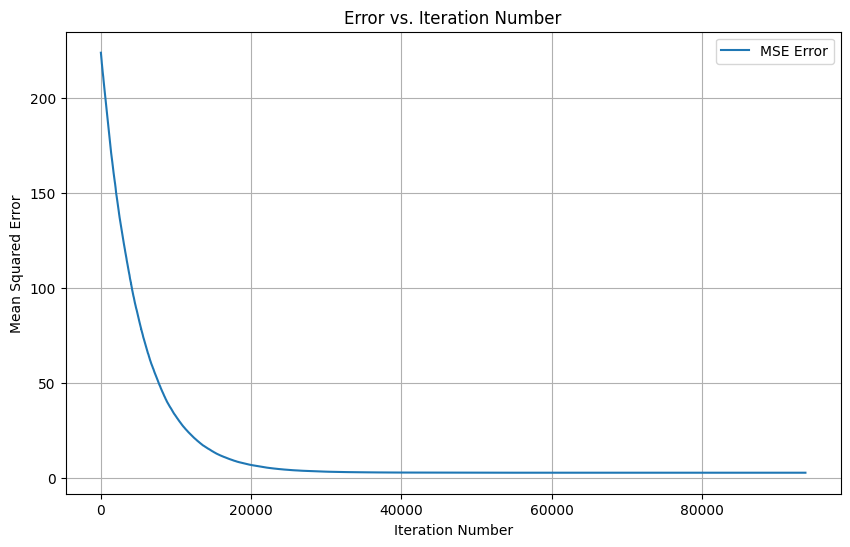

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(errors, label='MSE Error')
plt.xlabel('Iteration Number')
plt.ylabel('Mean Squared Error')
plt.title('Error vs. Iteration Number')
plt.legend()
plt.grid(True)
plt.show()

**Выведите вектор весов, к которому сошелся метод.**

In [37]:
final_w

array([14.03748568,  3.90619303,  2.79327688, -0.02682682])

**Выведите среднеквадратичную ошибку на последней итерации.**

In [38]:
last_error = errors[-1]
last_error

2.7845422476775616

In [39]:
# выполнение дополнительного задания

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Создаем и обучаем модель с помощью SGDRegressor
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_regressor.fit(X_scaled, y)
y_pred_sgd = sgd_regressor.predict(X_scaled)
mse_sgd = mean_squared_error(y, y_pred_sgd)
r2_sgd = r2_score(y, y_pred_sgd)

sgd_regressor.coef_, mse_sgd, r2_sgd

(array([ 7.01202833,  3.91753967,  2.77710561, -0.00844601]),
 2.7844414873048233,
 0.8971990020652535)

In [44]:
try:
    import tensorflow as tf
    print(f"TensorFlow установлен, версия: {tf.__version__}. Можно продолжать работу.")
except ImportError:
    print("TensorFlow установлен. Выполним установку TensorFlow...")
    !pip install tensorflow


TensorFlow is not installed. Installing TensorFlow...
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [45]:
# выполним также обучение модели с помощью класса в tensorflow
import tensorflow as tf

# Определение модели.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(X_scaled.shape[1],))
])
model.compile(optimizer='sgd', loss='mean_squared_error')
history = model.fit(X_scaled, y, epochs=100, verbose=0)

y_pred_tf = model.predict(X_scaled).flatten()
mse_tf = mean_squared_error(y, y_pred_tf)


weights_tf = model.get_weights()[0]
bias_tf = model.get_weights()[1]
weights_tf, mse_tf

ModuleNotFoundError: No module named 'tensorflow'